<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/%E5%9F%BA%E6%96%BC%E6%B3%A8%E6%84%8F%E5%8A%9B%E6%A9%9F%E5%88%B6%E5%9B%9E%E6%AD%B8%E6%A8%A1%E5%9E%8BV2(%E5%96%AE%E9%9A%BB%E8%9F%B2%E7%89%88%E6%9C%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/廢水案子/ALLdataset.csv',index_col = 0)
df = df.dropna(axis=0)
df = df.reset_index()
df['date'] = df['date'].astype('str')
df

,date,site,cindex,cName,classification,confidence,D
0,20210927,T753,101,輪蟲幼蟲,101_輪蟲幼蟲,0.371431,39.638027
1,20210927,T753,116,絲狀菌,116_絲狀菌,0.996904,18.817467
2,20210927,T753,125,膜袋蟲,125_膜袋蟲,0.828820,35.845880
3,20210927,T753,116,絲狀菌,116_絲狀菌,0.418498,32.625321
4,20210927,T753,116,絲狀菌,116_絲狀菌,0.998210,22.131402
...,...,...,...,...,...,...,...
954460,20230216,T753,118,尾絲蟲,118_尾絲蟲,0.997261,41.925688
954461,20230216,T753,116,絲狀菌,116_絲狀菌,0.975901,86.942615
954462,20230216,T753,118,尾絲蟲,118_尾絲蟲,0.819361,31.534747
954463,20230216,T753,127,滴蟲,127_滴蟲,0.896282,43.294135


In [34]:
#對蟲和時間進行遍歷
new_dict = {}
df = df[df.cName=='尾絲蟲']#在這裡指定種類
for i in df.cName.unique():
  new_dict[i] = pd.DataFrame()#用來存放特定蟲的資料
  for j in tqdm(df.date.unique()):
    # 特定蟲種類在特定日期的狀況
    d = df[(df['cName']==i)&(df['date']==j)]
    # 按照百分位方式分四組Q1,Q2,Q3
    Q1,Q2,Q3 = d['D'].quantile([0.25, 0.5, 0.75]).values
    # 計算各筆資料的D值算是屬於哪一組
    d['bin'] = d['D'].apply(lambda x: 'Q1' if x <= Q1 else ('Q2' if x <= Q2 else ('Q3' if x <= Q3 else 'Q4')))
    new_dict[i][j] = d.groupby('bin').size()
    print(i,j)# 顯示蟲名稱和時間
    print(d.groupby('bin').size()) #顯示各組筆數

  0%|          | 0/279 [00:00<?, ?it/s]

尾絲蟲 20210927
bin
Q1    82
Q2    80
Q3    81
Q4    80
dtype: int64
尾絲蟲 20210928
bin
Q1    84
Q2    83
Q3    83
Q4    84
dtype: int64
尾絲蟲 20210929
bin
Q1    127
Q2    127
Q3    126
Q4    127
dtype: int64
尾絲蟲 20210930
bin
Q1    196
Q2    200
Q3    191
Q4    196
dtype: int64
尾絲蟲 20211004
bin
Q1    110
Q2    105
Q3    107
Q4    107
dtype: int64
尾絲蟲 20211005
bin
Q1    90
Q2    90
Q3    92
Q4    87
dtype: int64
尾絲蟲 20211006
bin
Q1    85
Q2    85
Q3    83
Q4    84
dtype: int64
尾絲蟲 20211007
bin
Q1    75
Q2    76
Q3    74
Q4    75
dtype: int64
尾絲蟲 20211008
bin
Q1    83
Q2    81
Q3    78
Q4    81
dtype: int64
尾絲蟲 20211014
bin
Q1    31
Q2    30
Q3    30
Q4    30
dtype: int64
尾絲蟲 20211015
bin
Q1    37
Q2    36
Q3    36
Q4    37
dtype: int64
尾絲蟲 20211018
bin
Q1    58
Q2    58
Q3    57
Q4    58
dtype: int64
尾絲蟲 20211019
bin
Q1    37
Q2    36
Q3    36
Q4    37
dtype: int64
尾絲蟲 20211020
bin
Q1    34
Q2    34
Q3    33
Q4    34
dtype: int64
尾絲蟲 20211021
bin
Q1    51
Q2    51
Q3    50
Q4    51
dtype: int6

In [35]:
new_dict['尾絲蟲']

,20210927,20210928,20210929,20210930,20211004,20211005,20211006,20211007,20211008,20211014,...,20230203,20230206,20230207,20230208,20230209,20230210,20230213,20230214,20230215,20230216
bin,,,,,,,,,,,,,,,,,,,,,
Q1,82,84,127,196,110,90,85,75,83,31,...,143,266,232,202,306,130,140,194,204,219
Q2,80,83,127,200,105,90,85,76,81,30,...,145,266,233,202,306,133,140,195,195,219
Q3,81,83,126,191,107,92,83,74,78,30,...,139,263,230,201,312,125,141,193,200,220
Q4,80,84,127,196,107,87,84,75,81,30,...,142,264,232,201,299,129,139,194,199,217


In [36]:
'''
df2 = pd.DataFrame()
for i in df['date'].unique():
  df2[i] = df[df['date']==i].D.quantile(q=np.arange(0, 1.1, 0.1))
df2
'''

"\ndf2 = pd.DataFrame()\nfor i in df['date'].unique():\n  df2[i] = df[df['date']==i].D.quantile(q=np.arange(0, 1.1, 0.1))\ndf2\n"

In [37]:
df2 = new_dict['尾絲蟲']
df2

,20210927,20210928,20210929,20210930,20211004,20211005,20211006,20211007,20211008,20211014,...,20230203,20230206,20230207,20230208,20230209,20230210,20230213,20230214,20230215,20230216
bin,,,,,,,,,,,,,,,,,,,,,
Q1,82,84,127,196,110,90,85,75,83,31,...,143,266,232,202,306,130,140,194,204,219
Q2,80,83,127,200,105,90,85,76,81,30,...,145,266,233,202,306,133,140,195,195,219
Q3,81,83,126,191,107,92,83,74,78,30,...,139,263,230,201,312,125,141,193,200,220
Q4,80,84,127,196,107,87,84,75,81,30,...,142,264,232,201,299,129,139,194,199,217


In [38]:
def normalize(df):
    for col in df.columns:
        df[col] = df[col] / df[col].sum()
    return df

df2 = normalize(df2.copy())
df2

,20210927,20210928,20210929,20210930,20211004,20211005,20211006,20211007,20211008,20211014,...,20230203,20230206,20230207,20230208,20230209,20230210,20230213,20230214,20230215,20230216
bin,,,,,,,,,,,,,,,,,,,,,
Q1,0.253870,0.251497,0.250493,0.250319,0.256410,0.250696,0.252226,0.250000,0.256966,0.256198,...,0.251318,0.251180,0.250270,0.25062,0.250204,0.251451,0.250000,0.250000,0.255639,0.250286
Q2,0.247678,0.248503,0.250493,0.255428,0.244755,0.250696,0.252226,0.253333,0.250774,0.247934,...,0.254833,0.251180,0.251348,0.25062,0.250204,0.257253,0.250000,0.251289,0.244361,0.250286
Q3,0.250774,0.248503,0.248521,0.243934,0.249417,0.256267,0.246291,0.246667,0.241486,0.247934,...,0.244288,0.248347,0.248112,0.24938,0.255110,0.241779,0.251786,0.248711,0.250627,0.251429
Q4,0.247678,0.251497,0.250493,0.250319,0.249417,0.242340,0.249258,0.250000,0.250774,0.247934,...,0.249561,0.249292,0.250270,0.24938,0.244481,0.249516,0.248214,0.250000,0.249373,0.248000


In [39]:
df2.sum(axis=0)

20210927    1.0
20210928    1.0
20210929    1.0
20210930    1.0
20211004    1.0
           ... 
20230210    1.0
20230213    1.0
20230214    1.0
20230215    1.0
20230216    1.0
Length: 279, dtype: float64

# batch,features_size,time_step

In [40]:
import numpy as np

X_train = []
y_train = []

for i in range(0, len(df2.columns), 14):
    x = df2.iloc[:,i:i+7].values
    y = df2.iloc[:,i+7:i+14].values
    cond1 = x.shape[1] == 7
    cond2 = y.shape[1] == 7
    if cond1 and cond2 :
      X_train.append(x)
      y_train.append(y)

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape, y_train.shape)


(19, 4, 7) (19, 4, 7)


# 基於注意力機制(transformer核心精神)的回歸模型

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AttentionModule(nn.Module):
    def __init__(self, input_channels):
        super(AttentionModule, self).__init__()

        self.query_conv = nn.Conv1d(in_channels=input_channels, out_channels=input_channels // 2, kernel_size=1)
        self.key_conv = nn.Conv1d(in_channels=input_channels, out_channels=input_channels // 2, kernel_size=1)
        self.value_conv = nn.Conv1d(in_channels=input_channels, out_channels=input_channels, kernel_size=1)

        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        batch_size, channels, width = x.size()

        proj_query = self.query_conv(x).view(batch_size, -1, width).permute(0, 2, 1)
        proj_key = self.key_conv(x).view(batch_size, -1, width)
        energy = torch.bmm(proj_query, proj_key)

        attention = F.softmax(energy, dim=-1)
        #attention = F.normalize(energy, p=1, dim=-1)

        proj_value = self.value_conv(x).view(batch_size, -1, width)
        out = torch.bmm(proj_value, attention.permute(0, 2, 1))
        out = out.view(batch_size, channels, width)

        out = self.gamma * out + x
        return out,attention

class AttentionModel(nn.Module):
    def __init__(self):
        super(AttentionModel, self).__init__()

        self.attention = AttentionModule(input_channels=4)

    def forward(self, x):
        x,attention = self.attention(x)
        return x,attention

# 測試模型
model = AttentionModel()
input_matrix = torch.from_numpy(X_train).float()
target_matrix = torch.from_numpy(y_train).float()
# Forward pass
output_tensor,attention = model(input_matrix)
print("Input shape:", input_matrix.shape)
print("Output shape:", output_tensor.shape)
print("attention shape:", attention.shape)

Input shape: torch.Size([19, 4, 7])
Output shape: torch.Size([19, 4, 7])
attention shape: torch.Size([19, 7, 7])


In [42]:
print("Input Matrix:")
print(input_matrix)
print("Output Matrix after Attention:")
print(output_tensor)
print('attn_weights')
print(attention)

Input Matrix:
tensor([[[0.2539, 0.2515, 0.2505, 0.2503, 0.2564, 0.2507, 0.2522],
         [0.2477, 0.2485, 0.2505, 0.2554, 0.2448, 0.2507, 0.2522],
         [0.2508, 0.2485, 0.2485, 0.2439, 0.2494, 0.2563, 0.2463],
         [0.2477, 0.2515, 0.2505, 0.2503, 0.2494, 0.2423, 0.2493]],

        [[0.2512, 0.2511, 0.2542, 0.2506, 0.2503, 0.2507, 0.2519],
         [0.2512, 0.2511, 0.2470, 0.2506, 0.2503, 0.2566, 0.2494],
         [0.2463, 0.2468, 0.2494, 0.2481, 0.2490, 0.2419, 0.2519],
         [0.2512, 0.2511, 0.2494, 0.2506, 0.2503, 0.2507, 0.2468]],

        [[0.2545, 0.2500, 0.2530, 0.2500, 0.2520, 0.2523, 0.2504],
         [0.2455, 0.2500, 0.2490, 0.2522, 0.2480, 0.2546, 0.2504],
         [0.2455, 0.2500, 0.2490, 0.2485, 0.2493, 0.2454, 0.2487],
         [0.2545, 0.2500, 0.2490, 0.2493, 0.2507, 0.2477, 0.2504]],

        [[0.2522, 0.2536, 0.2502, 0.2519, 0.2515, 0.2504, 0.2510],
         [0.2478, 0.2497, 0.2514, 0.2496, 0.2523, 0.2519, 0.2510],
         [0.2510, 0.2471, 0.2495, 0.2490, 

# 訓練模型

In [43]:
import torch.optim as optim

# 定義損失函數和優化器
criterion = nn.SmoothL1Loss()  # 使用均方誤差作為損失函數
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 使用Adam優化器

# 訓練模型
num_epochs = 100
torch_input = input_matrix
target = target_matrix
loss_list = []

for epoch in range(num_epochs):
    # 將模型設置為訓練模式
    model.train()

    # 前向傳播
    output = model(torch_input)

    # 計算損失
    loss = criterion(output[0], target[0])  # 這裡的target是你的目標輸出，需要根據你的任務而定
    loss_list.append(loss.detach())

    # 反向傳播 梯度下降 清空梯度
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # 每隔一段時間印出一次損失
    if epoch % 5 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')

# 訓練完成後，你可以使用模型進行預測
model.eval()
final_output = model(torch_input)
print("Final Model Output:")


Epoch 0/100, Loss: 1.7265938367927447e-05
Epoch 5/100, Loss: 1.7206182747031562e-05
Epoch 10/100, Loss: 1.715738653729204e-05
Epoch 15/100, Loss: 1.7119538824772462e-05
Epoch 20/100, Loss: 1.709193384158425e-05
Epoch 25/100, Loss: 1.7072985428967513e-05
Epoch 30/100, Loss: 1.706052353256382e-05
Epoch 35/100, Loss: 1.705221256997902e-05
Epoch 40/100, Loss: 1.704605165286921e-05
Epoch 45/100, Loss: 1.7040689272107556e-05
Epoch 50/100, Loss: 1.703541238384787e-05
Epoch 55/100, Loss: 1.703003545117099e-05
Epoch 60/100, Loss: 1.702459849184379e-05
Epoch 65/100, Loss: 1.701920155028347e-05
Epoch 70/100, Loss: 1.7013890101225115e-05
Epoch 75/100, Loss: 1.7008636859827675e-05
Epoch 80/100, Loss: 1.7003418179228902e-05
Epoch 85/100, Loss: 1.6998188584693708e-05
Epoch 90/100, Loss: 1.6992929886328056e-05
Epoch 95/100, Loss: 1.6987640265142545e-05
Final Model Output:


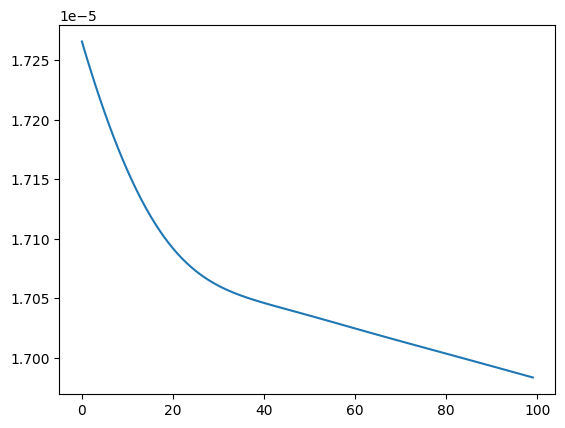

In [44]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

In [47]:
final_output[0][0]

tensor([[0.2534, 0.2510, 0.2500, 0.2499, 0.2560, 0.2502, 0.2518],
        [0.2486, 0.2494, 0.2514, 0.2563, 0.2457, 0.2516, 0.2531],
        [0.2507, 0.2484, 0.2484, 0.2438, 0.2493, 0.2562, 0.2462],
        [0.2488, 0.2526, 0.2516, 0.2514, 0.2505, 0.2434, 0.2503]],
       grad_fn=<SelectBackward0>)

In [51]:
target_matrix[0]

tensor([[0.2500, 0.2570, 0.2562, 0.2534, 0.2511, 0.2534, 0.2519],
        [0.2533, 0.2508, 0.2479, 0.2466, 0.2511, 0.2466, 0.2519],
        [0.2467, 0.2415, 0.2479, 0.2466, 0.2468, 0.2466, 0.2444],
        [0.2500, 0.2508, 0.2479, 0.2534, 0.2511, 0.2534, 0.2519]])